# Table of Contents
## This script contains the following:
1. Import libraries
2. Import Data
3. Data Cleaning
4. Data Prep for Regression Analysis
5. Regression Analysis

# 1.0 Import libraries

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2.0 Import data

In [107]:
# Define project folder path
path = r'/Users/sharnti/Desktop/CareerFoundry/Data Immersion/Achievement 6/Project'

In [108]:
# Import runups dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'runups_clean.pkl'))

In [109]:
# Display info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17570 entries, 1 to 4582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  17570 non-null  datetime64[ns]
 1   tsunami_event_id      17570 non-null  int64         
 2   tsunami_valid         17570 non-null  int64         
 3   earthquake_magnitude  16906 non-null  float64       
 4   country               17570 non-null  object        
 5   location              17570 non-null  object        
 6   latitude              17570 non-null  float64       
 7   longitude             17570 non-null  float64       
 8   distance_source_km    17570 non-null  float64       
 9   max_water_height_m    17570 non-null  float64       
 10  flag_earthquake       17570 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 1.6+ MB


# 3.0 Data cleaning

In [111]:
# Calculate descriptive statistics
df.describe()

,date,tsunami_event_id,tsunami_valid,earthquake_magnitude,latitude,longitude,distance_source_km,max_water_height_m
count,17570,17570.000000,17570.0,16906.000000,17570.000000,17570.000000,17570.000000,17570.000000
mean,2009-10-25 23:48:31.553784832,4507.532157,4.0,8.458961,15.621313,56.601405,1867.800364,4.779530
min,1985-03-03 00:00:00,2158.000000,4.0,3.700000,-77.850000,-179.797800,0.000000,0.010000
25%,2005-03-28 00:00:00,2749.000000,4.0,7.900000,-6.679972,-71.331216,99.817089,0.472500
50%,2011-03-11 00:00:00,5413.000000,4.0,8.800000,24.984190,119.874503,189.017878,2.640000
75%,2011-03-11 00:00:00,5413.000000,4.0,9.100000,38.723556,141.469660,1648.408622,6.200000
max,2024-12-17 00:00:00,5942.000000,4.0,9.100000,72.850000,179.302000,19265.830397,200.000000
std,NaN,1384.534342,0.0,0.728547,27.490680,113.772116,3588.056345,6.718171


In [112]:
df.columns

Index(['date', 'tsunami_event_id', 'tsunami_valid', 'earthquake_magnitude',
       'country', 'location', 'latitude', 'longitude', 'distance_source_km',
       'max_water_height_m', 'flag_earthquake'],
      dtype='object')

In [113]:
df.sample(10)

,date,tsunami_event_id,tsunami_valid,earthquake_magnitude,country,location,latitude,longitude,distance_source_km,max_water_height_m,flag_earthquake
3608,2004-12-26,2439,4,9.1,SRI LANKA,WELIGAMA TOWN,5.963713,80.456269,1747.620137,8.00,Yes
537,2015-09-16,5590,4,8.3,CHILE,COQUIMBO (WM58),-29.952637,-71.335763,182.537230,3.50,Yes
934,1994-09-16,5804,4,6.7,TAIWAN,PENG-HU,23.570000,119.550000,143.907532,0.19,Yes
4589,2011-03-11,5413,4,9.1,JAPAN,"IWATE PREFECTURE, TOHOKU REGION",39.812944,141.964083,171.976128,10.14,Yes
6198,2011-03-11,5413,4,9.1,JAPAN,HOKKAIDO PREFECTURE,42.063381,143.065179,422.341949,5.10,Yes
2750,2004-12-26,2439,4,9.1,MALDIVES,"HINNAVARU, LHAVIYANI",5.494630,73.412830,2516.580441,1.13,Yes
2275,2018-12-22,5699,4,NaN,INDONESIA,RAKATA,-6.141834,105.420852,4.411530,39.71,No
5292,2011-03-11,5413,4,9.1,JAPAN,"IWATE PREFECTURE, TOHOKU REGION",38.959028,141.697306,94.141819,15.02,Yes
3357,2011-03-11,5413,4,9.1,JAPAN,HAKODATE,41.718700,140.724700,405.134116,1.75,Yes
7157,2011-03-11,5413,4,9.1,JAPAN,"MIYAGI PREFECTURE, TOHOKU REGION",38.431944,141.289194,95.896794,2.72,Yes


## Missing values check

In [115]:
# Check for missing values
df.isnull().sum()

date                      0
tsunami_event_id          0
tsunami_valid             0
earthquake_magnitude    664
country                   0
location                  0
latitude                  0
longitude                 0
distance_source_km        0
max_water_height_m        0
flag_earthquake           0
dtype: int64

In [116]:
# Check frequency for flag_earthquake
df['flag_earthquake'].value_counts()

flag_earthquake
Yes    16906
No       664
Name: count, dtype: int64

In [117]:
# Drop any runups's that aren't associated with an earthquake
df = df[df['flag_earthquake']=='Yes']

df['flag_earthquake'].value_counts() # Check frequency for flag_earthquake

flag_earthquake
Yes    16906
Name: count, dtype: int64

In [118]:
# Check for missing values
df.isnull().sum()

date                    0
tsunami_event_id        0
tsunami_valid           0
earthquake_magnitude    0
country                 0
location                0
latitude                0
longitude               0
distance_source_km      0
max_water_height_m      0
flag_earthquake         0
dtype: int64

No missing values

## Duplicates check

In [121]:
dups = df.duplicated()

In [122]:
dups.shape # No dups

(16906,)

No duplicates

## Extreme values check

<Axes: xlabel='max_water_height_m', ylabel='Count'>

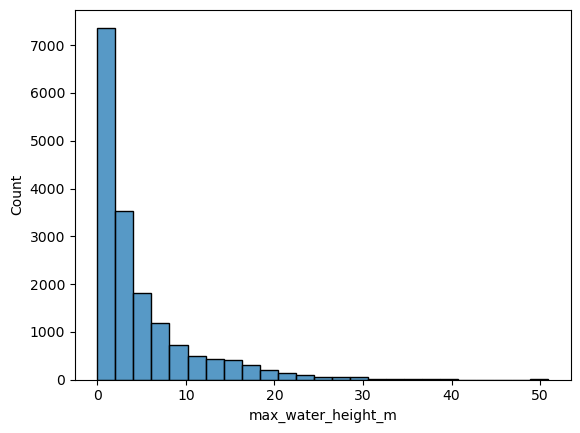

In [125]:
sns.histplot(df['max_water_height_m'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [126]:
df['max_water_height_m'].mean() # Check the mean

4.586952561220868

In [127]:
df['max_water_height_m'].median() # Check the median

2.6

In [128]:
df['max_water_height_m'].max() # Check the max

50.9

<Axes: ylabel='max_water_height_m'>

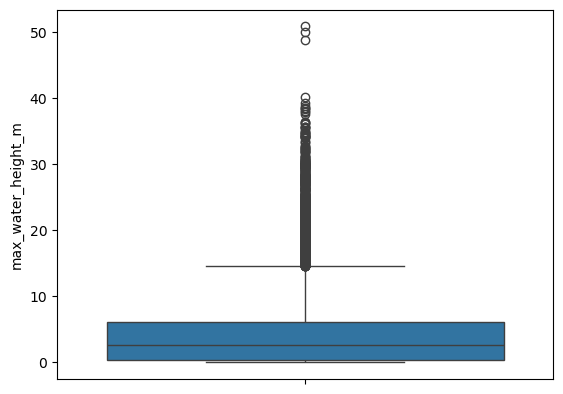

In [129]:
sns.boxplot(df['max_water_height_m'])

<Axes: xlabel='max_water_height_m', ylabel='Density'>

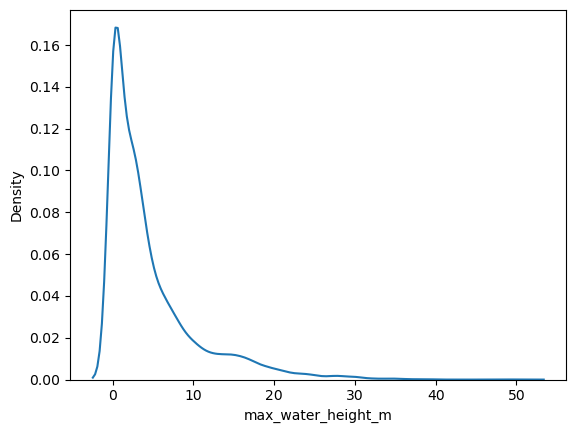

In [130]:
sns.kdeplot(df['max_water_height_m'])

In [131]:
upper_bound = df['max_water_height_m'].quantile(0.99)  # Top 1% as outliers
lower_bound = df['max_water_height_m'].quantile(0.01)  # Bottom 1% as outliers

In [132]:
upper_bound

26.528500000000022

**Note:** The data is right skewed, making it difficult to identify outliers. Would could use the extreme quantile method to identify and remove outliers, but as we don't want force the model to peform better, we will leave the extreme values in the dataset for the time being.

## Select variables of interest

In [158]:
runups = df[['earthquake_magnitude', 'latitude', 'distance_source_km', 'max_water_height_m']]

In [160]:
runups.head()

,earthquake_magnitude,latitude,distance_source_km,max_water_height_m
1,8.0,51.8630,13805.592696,0.05
3,8.0,55.3370,12889.004338,0.08
4,8.0,60.1190,12504.850389,0.03
6,8.0,-2.1833,3530.667449,0.20
7,8.0,19.7303,10596.671496,0.24


In [164]:
runups.shape

(16906, 4)

In [186]:
# Group by tsunami_event_id and perform the aggregations
tsunami = df.groupby('tsunami_event_id').agg(
    earthquake_magnitude=('earthquake_magnitude', 'max'),  # max earthquake_magnitude
    max_water_height=('max_water_height_m', 'max'),  # Max water height for each tsunami
    min_distance=('distance_source_km', 'min'),  # Min distance recorded per tsunami
    max_distance=('distance_source_km', 'max'), # Max distance recorded per tsunami
    runup_count=('tsunami_event_id', 'size')  # Count of records for each tsunami event
).reset_index()

# Display the aggregated dataframe
tsunami.head()

,tsunami_event_id,earthquake_magnitude,max_water_height,min_distance,max_distance,runup_count
0,2158,8.0,3.50,6.872275,18671.336544,61
1,2159,6.4,0.12,136.591891,136.591891,1
2,2161,7.3,1.30,75.897753,77.306166,2
3,2162,8.0,3.00,30.257031,8381.201316,19
4,2163,7.6,1.20,14.950854,2103.880534,3


In [188]:
tsunami.shape

(342, 6)

# 4.0 Data prep for regression analysis

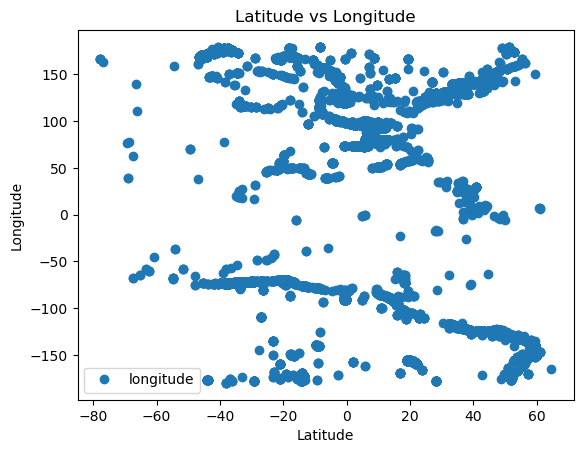

In [169]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'latitude', y='longitude',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Latitude vs Longitude')  
plt.xlabel('Latitude')  
plt.ylabel('Longitude')  
plt.show()

**Hypothesis:** Longitude increase as latitude increases. (i.e. runups are more likely to occur in north-east or south-west).

In [177]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['latitude'].values.reshape(-1,1)
y = df['longitude'].values.reshape(-1,1)

In [179]:
X

array([[ 51.863   ],
       [ 55.337   ],
       [ 60.119   ],
       ...,
       [ 39.351667],
       [-19.53256 ],
       [-17.7553  ]])

In [181]:
y

array([[-176.632   ],
       [-160.502   ],
       [-149.427   ],
       ...,
       [-127.052222],
       [ 169.26595 ],
       [ 168.3077  ]])

In [183]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5.0 Regression analysis

In [191]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [193]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [195]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

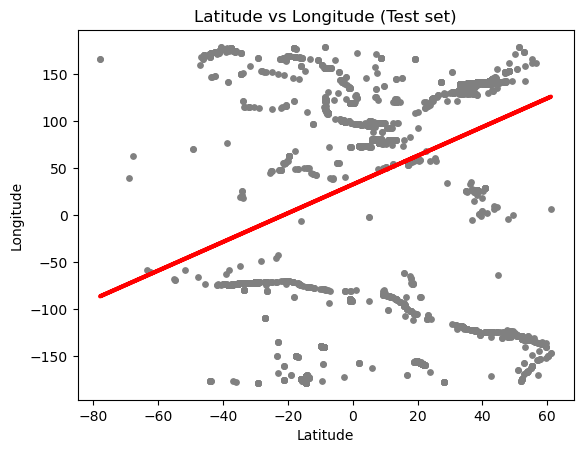

In [197]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Latitude vs Longitude (Test set)')
plot_test.xlabel('Latitude')
plot_test.ylabel('Longitude')
plot_test.show()

**Observation:** The model doesn't fit the data very well, as it only passes through a few points. Looking at the data, it's unlikely to have a linear relationship and perhaps a different model would be necessary.

In [200]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [202]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.52862464]]
Mean squared error:  11719.499557550267
R2 score:  0.1146400151741731


**Interpretation of model performance:**

_Slope:_ 1.52862464
- It looks like we have a positive relationship between the two variables.
_Mean squared error:_  11719.499557550267
- This is a very large Mean squared error, which suggests the regression line isn't a very accurate representation of the data.
_R2 score:_  0.1146400151741731
- This value is quite close to 1, meaning it is a poor fit.

In [205]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-95.196800,57.659120
1,137.262194,90.004800
2,141.634272,92.455539
3,-170.833580,11.059212
4,108.880500,21.111111
5,141.267500,91.674355
6,142.022597,93.532776
7,139.430000,97.283516
8,79.913060,43.169695
9,77.248389,45.436220


**Thoughts on performance of model:**
When you look a the actual data vs. the predicted values, its quite obvious to see that the model is a bad fit for the data!
The data could include bias in the form of missing data from smaller islands with low populations and a lack of expertise or equipment to record runup data during a tsunami. This could mean we are missing latitude/longitude readings from locations where there has been a runup.

**Note:** There are few _true_ contiuous variables in the set (as earthquake_magnitude and max_water_height_m tend to behave more like discrete values) so I was limited in choice as to what to use in this regression analysis. This is something I should have picked up on at the dataset selection phase, so I'll keep this in mind when planning further portfolio projects in the future!